In [21]:
import os
os.chdir("../scripts")

In [22]:
import data_preparation as dp
import experienceAnalysis as ea
from importlib import reload
from dotenv import load_dotenv

In [23]:
load_dotenv()

db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")

In [24]:
reload(dp)
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
query = "SELECT * FROM xdr_data"
data = dp.load_data(db_url, query)

In [25]:
reload(dp)
cleaned_data = dp.clean_data(data)

In [26]:
reload(ea)
data_user_experience_aggregated = ea.aggregate_user_experience(cleaned_data)
data_user_experience_aggregated.head()

,MSISDN/Number,Average TCP Retransmission,Average RTT,Handset Type,Average Throughput
0,3.360300e+10,1.129040e+06,30.152653,Samsung Galaxy A5 Sm-A520F,4694.128998
1,3.360301e+10,6.806669e+05,24.440917,Samsung Galaxy Note 8 (Sm-N950F),2217.750000
2,3.360301e+10,1.267104e+06,33.381834,Samsung Galaxy S7 (Sm-G930X),7.500000
3,3.360301e+10,1.267104e+06,11.000000,Apple iPhone X (A1901),57.500000
4,3.360301e+10,1.267104e+06,13.500000,Apple iPhone 7 (A1778),33.500000


In [29]:
reload(ea)

tcp_top, tcp_bottom, tcp_frequent = ea.compute_top_bottom_frequent(data_user_experience_aggregated, 'Average TCP Retransmission')
rtt_top, rtt_bottom, rtt_frequent = ea.compute_top_bottom_frequent(data_user_experience_aggregated, 'Average RTT')
throughput_top, throughput_bottom, throughput_frequent = ea.compute_top_bottom_frequent(data_user_experience_aggregated, 'Average Throughput')

In [30]:
print("Top 10 TCP Retransmission Values:\n", tcp_top)
print("Bottom 10 TCP Retransmission Values:\n", tcp_bottom)
print("Most Frequent TCP Retransmission Values:\n", tcp_frequent)

print("Top 10 RTT Values:\n", rtt_top)
print("Bottom 10 RTT Values:\n", rtt_bottom)
print("Most Frequent RTT Values:\n", rtt_frequent)

print("Top 10 Throughput Values:\n", throughput_top)
print("Bottom 10 Throughput Values:\n", throughput_bottom)
print("Most Frequent Throughput Values:\n", throughput_frequent)

Top 10 TCP Retransmission Values:
 323     4785151.25
348     4785151.25
425     4785151.25
968     4785151.25
1602    4785151.25
1704    4785151.25
1858    4785151.25
1898    4785151.25
1938    4785151.25
2319    4785151.25
Name: Average TCP Retransmission, dtype: float64
Bottom 10 TCP Retransmission Values:
 22871     48.5
5758      64.0
12945     67.0
1576      71.5
25262     88.0
77500     89.5
88795     91.0
86693     94.5
76011    104.0
4946     105.5
Name: Average TCP Retransmission, dtype: float64
Most Frequent TCP Retransmission Values:
 Average TCP Retransmission
1.267104e+06    46956
4.785151e+06     1284
1.239145e+06      299
3.026128e+06      230
1.239163e+06      147
2.927155e+04      123
2.993655e+04       68
2.865255e+04       67
1.239157e+06       65
1.253124e+06       64
Name: count, dtype: int64
Top 10 RTT Values:
 264     80.75
301     80.75
404     80.75
959     80.75
968     80.75
1094    80.75
1106    80.75
1112    80.75
1159    80.75
1551    80.75
Name: Average 

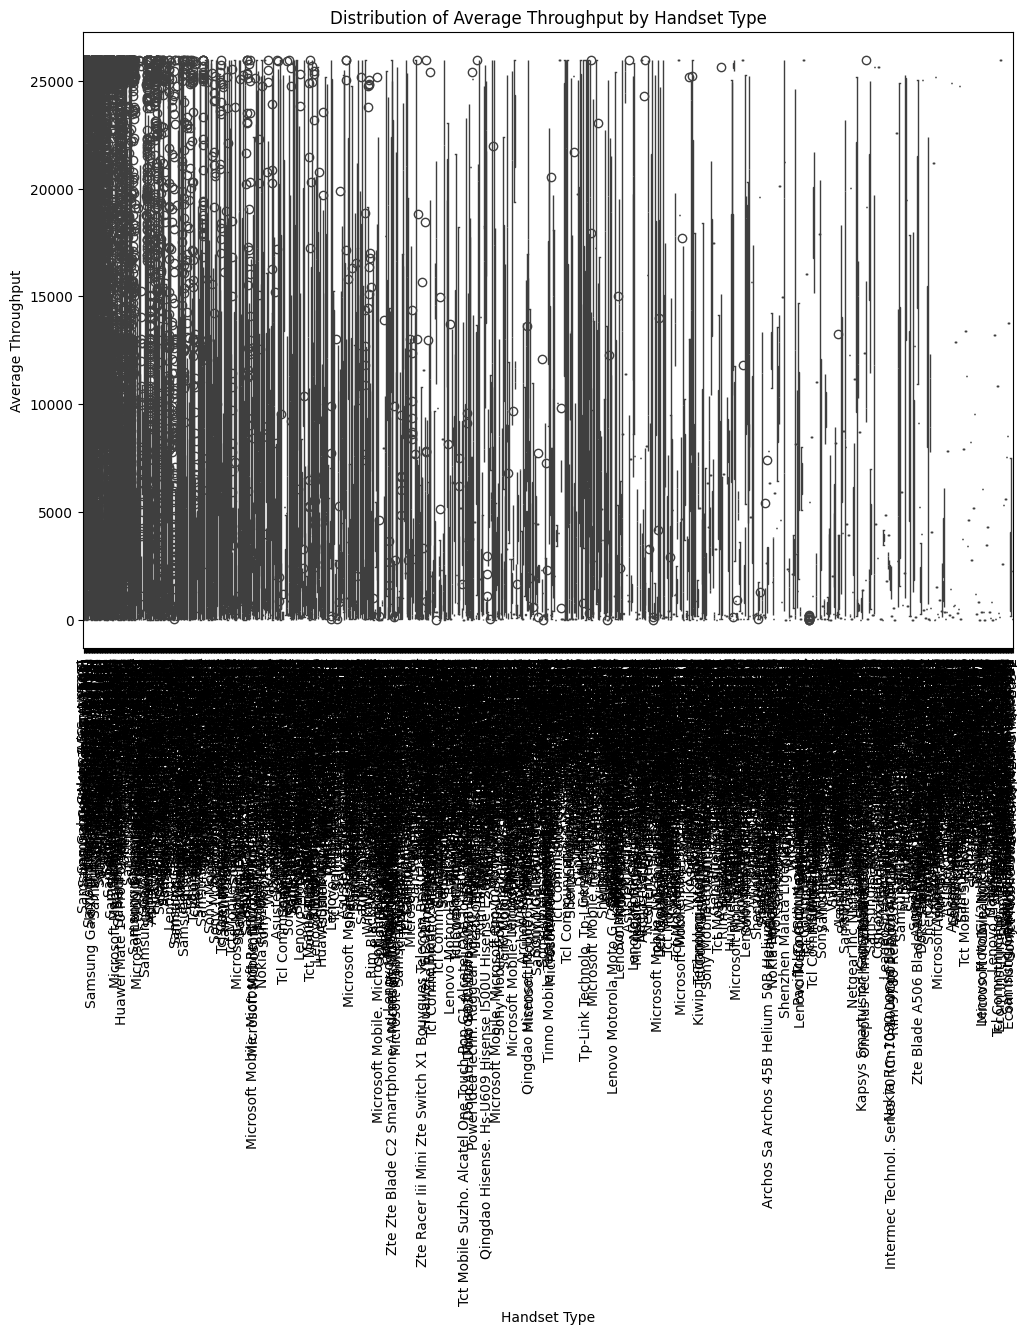

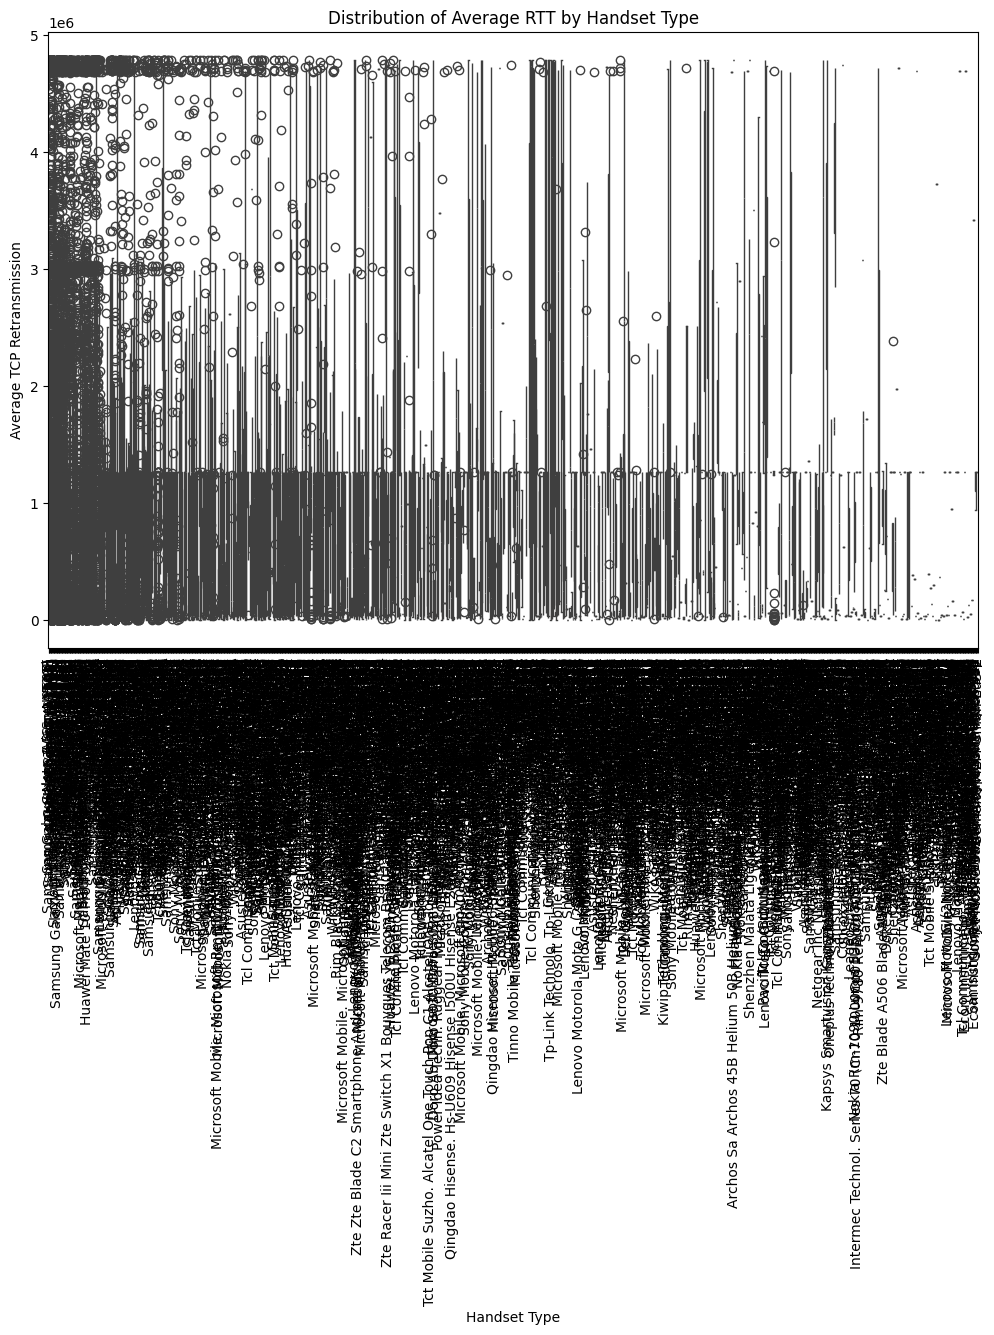

In [32]:
reload(ea)

ea.plot_distribution(data_user_experience_aggregated, 'Average Throughput', 'Handset Type', 'Distribution of Average Throughput by Handset Type')

ea.plot_distribution(data_user_experience_aggregated, 'Average TCP Retransmission', 'Handset Type', 'Distribution of Average RTT by Handset Type')